In [1]:
import os
import pandas as pd
import re

# Function to extract the number from the specific line
def extract_number_from_line(line):
    match = re.search(r"\d+", line)
    return int(match.group()) if match else None

# directory_t containing the files
directory_t = '.'

# List to hold individual dataframes
dfs = []

# Iterate over files in the directory_t
for filename in os.listdir(directory_t):
    if filename.endswith(("_positive.out", "_negative.out", "_animal.out")):
        with open(os.path.join(directory_t, filename), 'r') as file:
            for line in file:
                if "Domain search space  (domZ):" in line:
                    number = extract_number_from_line(line)
                    
                    # Determine the file type
                    if '_positive.out' in filename:
                        file_type = 'Positive'
                    elif '_negative.out' in filename:
                        file_type = 'Negative'
                    else:  # '_animal.out'
                        file_type = 'Animal'

                    file_identifier = filename.split('_')[0]
                    
                    # Create a DataFrame for this file
                    df = pd.DataFrame({'File': [file_identifier], file_type: [number]})
                    dfs.append(df)
                    break

# Concatenate all individual dataframes
final_df = pd.concat(dfs, ignore_index=True)

# Reshape the dataframe to have one row per file identifier
final_df = final_df.groupby('File').first().reset_index()
row_to_move = final_df.iloc[5]

final_df = final_df.drop(final_df.index[5])

final_df = pd.concat([pd.DataFrame([row_to_move]), final_df], ignore_index=True)
# Show the DataFrame
print(final_df)



   File  Negative  Positive  Animal
0  pfam       4.0      13.0    11.0
1  0.01       4.0      13.0    11.0
2  0.03       2.0      13.0    11.0
3  0.05       2.0      13.0    11.0
4  0.08       0.0       9.0    10.0
5   0.1       0.0       6.0    10.0


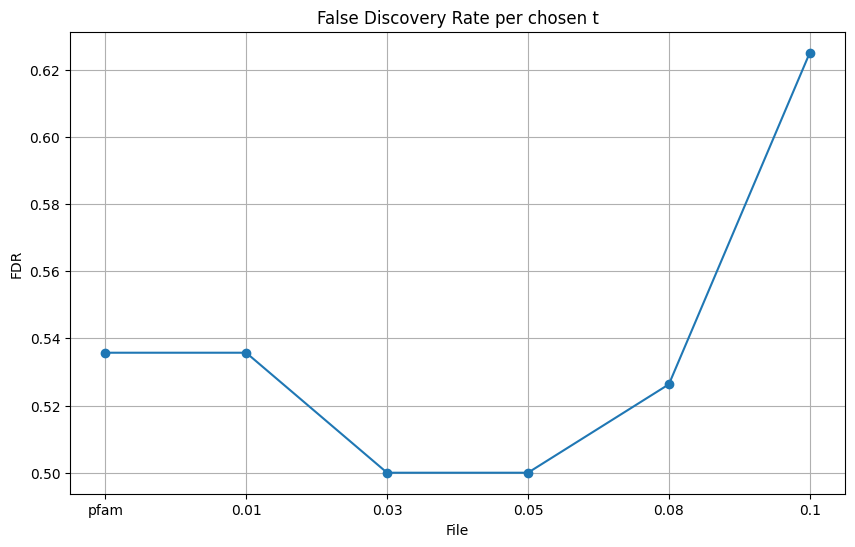

In [2]:
import matplotlib.pyplot as plt

# Calculate FDR
final_df['FDR'] = (final_df['Animal']+final_df['Negative']) / ((final_df['Animal']+final_df['Negative']) + final_df['Positive'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(final_df['File'], final_df['FDR'], marker='o')  # Line plot
# For a bar plot, use: plt.bar(df['File'], df['FDR'])
plt.xlabel('File')
plt.ylabel('FDR')
plt.title('False Discovery Rate per chosen t')
plt.grid(True)
plt.show()

In [5]:
import os
import pandas as pd
import re

# Function to extract the number from the specific line
def extract_number_from_line(line):
    match = re.search(r"\d+", line)
    return int(match.group()) if match else None

# Function to extract scores from the file
def extract_scores(file):
    scores = []
    start_extracting = False
    for line in file:
        if start_extracting:
            if line.strip() == '':  # End of score section
                break
            fields = line.strip().split()
            try:
                score = float(fields[1])

                scores.append(score)
            except:
                pass
        elif line.startswith('    E-value'):
            start_extracting = True

    return scores

# directory_t containing the files
directory_t = '.'

# List to hold individual dataframes
data = {}

# Iterate over files in the directory_t
for filename in os.listdir(directory_t):
    if filename.endswith(".out"):
        with open(os.path.join(directory_t, filename), 'r') as file:
            scores = extract_scores(file)
            file_type = 'Positive' if '_positive.out' in filename else 'Negative' if '_negative.out' in filename else 'Animal'
            file_identifier = filename.split('_')[0]
            
            # Create a DataFrame for this file
            if file_identifier not in data:
                data[file_identifier] = {}
            data[file_identifier][f'{file_type}_Scores'] = scores

final_df = pd.DataFrame.from_dict(data, orient='index').reset_index().rename(columns={'index': 'File'})

row_to_move = final_df.iloc[4]

final_df = final_df.drop(final_df.index[4])

final_df = pd.concat([pd.DataFrame([row_to_move]), final_df], ignore_index=True)


row_to_move = final_df.iloc[5]

final_df = final_df.drop(final_df.index[5])

final_df = pd.concat([pd.DataFrame([row_to_move]), final_df], ignore_index=True)

# Show the DataFrame
print(final_df)


   File           Negative_Scores  \
0  pfam  [82.5, 66.7, 48.6, 39.2]   
1  0.01  [70.4, 60.1, 42.5, 36.0]   
2  0.03              [43.5, 38.0]   
3  0.05              [27.2, 12.6]   
4  0.08                        []   
5   0.1                        []   

                                     Positive_Scores  \
0  [166.8, 163.8, 114.2, 110.9, 104.3, 99.7, 75.5...   
1  [152.5, 149.7, 106.4, 104.2, 97.4, 93.8, 68.4,...   
2  [121.6, 119.1, 86.8, 86.0, 78.8, 76.2, 51.1, 5...   
3  [93.1, 90.8, 67.5, 66.7, 59.5, 57.4, 34.2, 33....   
4  [58.5, 56.6, 43.1, 40.4, 34.1, 32.6, 14.4, 14....   
5               [41.0, 39.1, 29.7, 26.3, 20.5, 19.3]   

                                       Animal_Scores  
0  [232.7, 232.6, 232.6, 227.4, 224.6, 218.0, 218...  
1  [208.8, 208.7, 208.7, 201.8, 199.1, 196.8, 196...  
2  [165.8, 165.7, 165.7, 157.1, 157.1, 156.2, 153...  
3  [129.3, 129.2, 129.2, 122.5, 122.5, 118.0, 115...  
4  [85.9, 85.8, 85.8, 80.5, 80.5, 72.9, 71.1, 65....  
5  [63.4, 63.3, 6

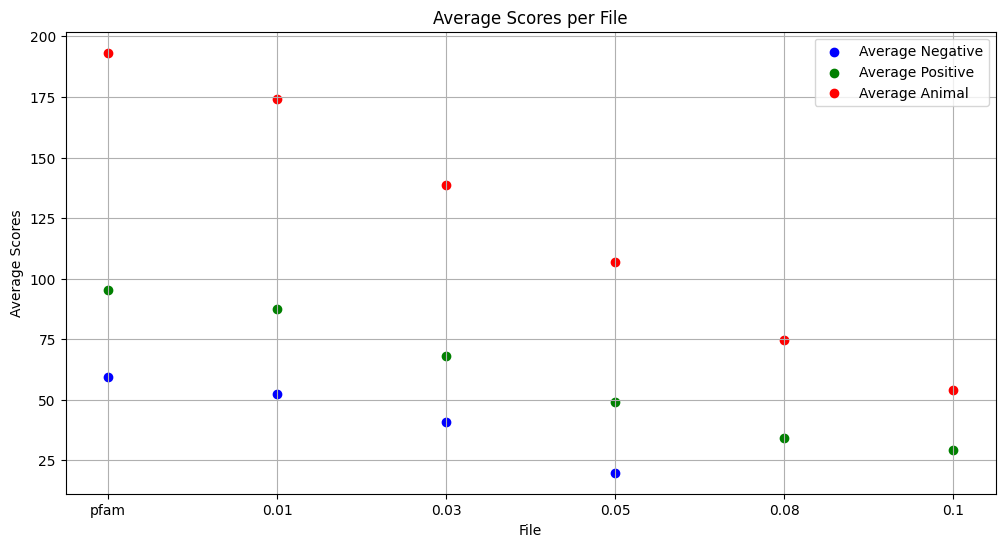

In [6]:
average_negative = final_df['Negative_Scores'].apply(lambda x: sum(x)/len(x) if x else None)
average_positive = final_df['Positive_Scores'].apply(lambda x: sum(x)/len(x) if x else None)
average_animal = final_df['Animal_Scores'].apply(lambda x: sum(x)/len(x) if x else None)

final_df['Average_Negative'] = average_negative
final_df['Average_Positive'] = average_positive
final_df['Average_Animal'] = average_animal

plt.figure(figsize=(12, 6))

# Plotting each average as a separate series so they each have a unique color and label
plt.scatter(final_df['File'], final_df['Average_Negative'], color='blue', label='Average Negative')
plt.scatter(final_df['File'], final_df['Average_Positive'], color='green', label='Average Positive')
plt.scatter(final_df['File'], final_df['Average_Animal'], color='red', label='Average Animal')

plt.xlabel('File')
plt.ylabel('Average Scores')
plt.title('Average Scores per File')
plt.legend()
plt.grid(True)
plt.show()
